# Кластеризація температурних даних з використанням алгоритму K-means для ранку, полудня та вечора

У цьому файлі проведено досліддення як застосувати алгоритм кластеризації K-means до температурних даних і класифікувати їх на ранкові, полуденні та вечірні кластери. Для реалізації алгоритму кластеризації я використовував популярну бібліотеку sklearn в мові програмування Python.

# Завантаження та розуміння даних
Розпочнемо з завантаження температурних даних з CSV-файлу в об'єкт DataFrame бібліотеки pandas та виведення перших кількох рядків даних:

In [1]:
import pandas as pd

# Завантаження даних з CSV-файлу
data = pd.read_csv('temperature_data.csv')

# Виведення перших кількох рядків даних
print("Початкові дані:")
print(data.head())
print()

Початкові дані:
  Timestamp  Temperature
0  21:00:01        18.81
1  21:00:03        18.81
2  21:00:05        18.81
3  21:00:06        18.81
4  21:00:08        18.87



# Конвертація стовпця Timestamp в формат DateTime
Для зручної роботи з операціями, пов'язаними з часом, необхідно перетворити стовпець "Timestamp" у формат DateTime:

In [2]:
# Конвертація стовпця Timestamp в формат DateTime
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
print(data.head())

C:\Users\pavlo\AppData\Local\Temp\ipykernel_6588\3440563899.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


            Timestamp  Temperature
0 2023-06-04 21:00:01        18.81
1 2023-06-04 21:00:03        18.81
2 2023-06-04 21:00:05        18.81
3 2023-06-04 21:00:06        18.81
4 2023-06-04 21:00:08        18.87


# Виділення години доби
Зараз давайте виділимо годину з стовпця "Timestamp" за допомогою атрибута .dt.hour бібліотеки pandas:

In [3]:
# Виділення години зі стовпця Timestamp
data['Hour'] = data['Timestamp'].dt.hour
print(data.head())

            Timestamp  Temperature  Hour
0 2023-06-04 21:00:01        18.81    21
1 2023-06-04 21:00:03        18.81    21
2 2023-06-04 21:00:05        18.81    21
3 2023-06-04 21:00:06        18.81    21
4 2023-06-04 21:00:08        18.87    21


# Відповідність години до часу доби
На основі витягнутої години ми будемо відповідати кожному значенню температури відповідному часу доби: ранку, полудню або вечору. Для цього ми використовуємо лямбда-функцію:

In [4]:
# Відповідність години до ранку, полудня або вечора
data['TimeOfDay'] = data['Hour'].apply(lambda hour: 'morning' if 6 <= hour < 12 else 'noon' if 12 <= hour < 18 else 'evening')
print(data.head())

            Timestamp  Temperature  Hour TimeOfDay
0 2023-06-04 21:00:01        18.81    21   evening
1 2023-06-04 21:00:03        18.81    21   evening
2 2023-06-04 21:00:05        18.81    21   evening
3 2023-06-04 21:00:06        18.81    21   evening
4 2023-06-04 21:00:08        18.87    21   evening


# Кодування one-hot
Для використання стовпця "TimeOfDay" у нашому алгоритмі кластеризації потрібно перетворити його на числові значення. Ми зробимо це за допомогою кодування one-hot:

In [5]:
# Виконання кодування one-hot для стовпця TimeOfDay
data_encoded = pd.get_dummies(data, columns=['TimeOfDay'])
print(data.head())

            Timestamp  Temperature  Hour TimeOfDay
0 2023-06-04 21:00:01        18.81    21   evening
1 2023-06-04 21:00:03        18.81    21   evening
2 2023-06-04 21:00:05        18.81    21   evening
3 2023-06-04 21:00:06        18.81    21   evening
4 2023-06-04 21:00:08        18.87    21   evening


# Вибір ознак для кластеризації
Тепер виділимо необхідні стовпці для кластеризації. У нашому випадку ми обираємо стовпець "Temperature" разом з закодованими one-hot стовпцями для ранку, полудня і вечора:

In [6]:
# Вибір необхідних стовпців для кластеризації
X = data_encoded[['Temperature', 'TimeOfDay_morning', 'TimeOfDay_noon', 'TimeOfDay_evening']].copy()
print(X.head())

   Temperature  TimeOfDay_morning  TimeOfDay_noon  TimeOfDay_evening
0        18.81              False           False               True
1        18.81              False           False               True
2        18.81              False           False               True
3        18.81              False           False               True
4        18.87              False           False               True


# Застосування алгоритму кластеризації K-means
Для проведення кластеризації застосуємо алгоритм кластеризації K-means. Визначимо кількість кластерів, яку ми хочемо отримати з даних. У нашому випадку, ми обираємо три кластери: ранкові температури, полуденні температури і вечірні температури. Застосуємо алгоритм кластеризації K-means за допомогою бібліотеки sklearn:

In [7]:
from sklearn.cluster import KMeans

# Визначення кількості кластерів
n_clusters = 3

# Виконання алгоритму кластеризації K-means
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

C:\Users\pavlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# Додавання міток кластерів до даних
Після кластеризації додамо отримані мітки кластерів до початкових даних:

In [8]:
# Додавання міток кластерів до даних
data['Cluster'] = kmeans.labels_

# Виведення міток кластеру
for index, row in data.iterrows():
    print(f"Запис {index}: Мітка кластеру - {row['Cluster']}")

Запис 0: Мітка кластеру - 0
Запис 1: Мітка кластеру - 0
Запис 2: Мітка кластеру - 0
Запис 3: Мітка кластеру - 0
Запис 4: Мітка кластеру - 0
Запис 5: Мітка кластеру - 0
Запис 6: Мітка кластеру - 0
Запис 7: Мітка кластеру - 0
Запис 8: Мітка кластеру - 0
Запис 9: Мітка кластеру - 0
Запис 10: Мітка кластеру - 0
Запис 11: Мітка кластеру - 0
Запис 12: Мітка кластеру - 0
Запис 13: Мітка кластеру - 0
Запис 14: Мітка кластеру - 0
Запис 15: Мітка кластеру - 0
Запис 16: Мітка кластеру - 0
Запис 17: Мітка кластеру - 0
Запис 18: Мітка кластеру - 0
Запис 19: Мітка кластеру - 0
Запис 20: Мітка кластеру - 0
Запис 21: Мітка кластеру - 0
Запис 22: Мітка кластеру - 0
Запис 23: Мітка кластеру - 0
Запис 24: Мітка кластеру - 0
Запис 25: Мітка кластеру - 0
Запис 26: Мітка кластеру - 0
Запис 27: Мітка кластеру - 0
Запис 28: Мітка кластеру - 0
Запис 29: Мітка кластеру - 0
Запис 30: Мітка кластеру - 0
Запис 31: Мітка кластеру - 0
Запис 32: Мітка кластеру - 0
Запис 33: Мітка кластеру - 0
Запис 34: Мітка кластеру

Запис 2440: Мітка кластеру - 0
Запис 2441: Мітка кластеру - 0
Запис 2442: Мітка кластеру - 0
Запис 2443: Мітка кластеру - 0
Запис 2444: Мітка кластеру - 0
Запис 2445: Мітка кластеру - 0
Запис 2446: Мітка кластеру - 0
Запис 2447: Мітка кластеру - 0
Запис 2448: Мітка кластеру - 0
Запис 2449: Мітка кластеру - 0
Запис 2450: Мітка кластеру - 0
Запис 2451: Мітка кластеру - 0
Запис 2452: Мітка кластеру - 0
Запис 2453: Мітка кластеру - 0
Запис 2454: Мітка кластеру - 0
Запис 2455: Мітка кластеру - 0
Запис 2456: Мітка кластеру - 0
Запис 2457: Мітка кластеру - 0
Запис 2458: Мітка кластеру - 0
Запис 2459: Мітка кластеру - 0
Запис 2460: Мітка кластеру - 0
Запис 2461: Мітка кластеру - 0
Запис 2462: Мітка кластеру - 0
Запис 2463: Мітка кластеру - 0
Запис 2464: Мітка кластеру - 0
Запис 2465: Мітка кластеру - 0
Запис 2466: Мітка кластеру - 0
Запис 2467: Мітка кластеру - 0
Запис 2468: Мітка кластеру - 0
Запис 2469: Мітка кластеру - 0
Запис 2470: Мітка кластеру - 0
Запис 2471: Мітка кластеру - 0
Запис 24

Запис 5010: Мітка кластеру - 0
Запис 5011: Мітка кластеру - 0
Запис 5012: Мітка кластеру - 0
Запис 5013: Мітка кластеру - 0
Запис 5014: Мітка кластеру - 0
Запис 5015: Мітка кластеру - 0
Запис 5016: Мітка кластеру - 0
Запис 5017: Мітка кластеру - 0
Запис 5018: Мітка кластеру - 0
Запис 5019: Мітка кластеру - 0
Запис 5020: Мітка кластеру - 0
Запис 5021: Мітка кластеру - 0
Запис 5022: Мітка кластеру - 0
Запис 5023: Мітка кластеру - 0
Запис 5024: Мітка кластеру - 0
Запис 5025: Мітка кластеру - 0
Запис 5026: Мітка кластеру - 0
Запис 5027: Мітка кластеру - 0
Запис 5028: Мітка кластеру - 0
Запис 5029: Мітка кластеру - 0
Запис 5030: Мітка кластеру - 0
Запис 5031: Мітка кластеру - 0
Запис 5032: Мітка кластеру - 0
Запис 5033: Мітка кластеру - 0
Запис 5034: Мітка кластеру - 0
Запис 5035: Мітка кластеру - 0
Запис 5036: Мітка кластеру - 0
Запис 5037: Мітка кластеру - 0
Запис 5038: Мітка кластеру - 0
Запис 5039: Мітка кластеру - 0
Запис 5040: Мітка кластеру - 0
Запис 5041: Мітка кластеру - 0
Запис 50

Запис 7243: Мітка кластеру - 0
Запис 7244: Мітка кластеру - 0
Запис 7245: Мітка кластеру - 0
Запис 7246: Мітка кластеру - 0
Запис 7247: Мітка кластеру - 0
Запис 7248: Мітка кластеру - 0
Запис 7249: Мітка кластеру - 0
Запис 7250: Мітка кластеру - 0
Запис 7251: Мітка кластеру - 0
Запис 7252: Мітка кластеру - 0
Запис 7253: Мітка кластеру - 0
Запис 7254: Мітка кластеру - 0
Запис 7255: Мітка кластеру - 0
Запис 7256: Мітка кластеру - 0
Запис 7257: Мітка кластеру - 0
Запис 7258: Мітка кластеру - 0
Запис 7259: Мітка кластеру - 0
Запис 7260: Мітка кластеру - 0
Запис 7261: Мітка кластеру - 0
Запис 7262: Мітка кластеру - 0
Запис 7263: Мітка кластеру - 0
Запис 7264: Мітка кластеру - 0
Запис 7265: Мітка кластеру - 0
Запис 7266: Мітка кластеру - 0
Запис 7267: Мітка кластеру - 0
Запис 7268: Мітка кластеру - 0
Запис 7269: Мітка кластеру - 0
Запис 7270: Мітка кластеру - 0
Запис 7271: Мітка кластеру - 0
Запис 7272: Мітка кластеру - 0
Запис 7273: Мітка кластеру - 0
Запис 7274: Мітка кластеру - 0
Запис 72

Запис 9625: Мітка кластеру - 0
Запис 9626: Мітка кластеру - 0
Запис 9627: Мітка кластеру - 0
Запис 9628: Мітка кластеру - 0
Запис 9629: Мітка кластеру - 0
Запис 9630: Мітка кластеру - 0
Запис 9631: Мітка кластеру - 0
Запис 9632: Мітка кластеру - 0
Запис 9633: Мітка кластеру - 0
Запис 9634: Мітка кластеру - 0
Запис 9635: Мітка кластеру - 0
Запис 9636: Мітка кластеру - 0
Запис 9637: Мітка кластеру - 0
Запис 9638: Мітка кластеру - 0
Запис 9639: Мітка кластеру - 0
Запис 9640: Мітка кластеру - 0
Запис 9641: Мітка кластеру - 0
Запис 9642: Мітка кластеру - 0
Запис 9643: Мітка кластеру - 0
Запис 9644: Мітка кластеру - 0
Запис 9645: Мітка кластеру - 0
Запис 9646: Мітка кластеру - 0
Запис 9647: Мітка кластеру - 0
Запис 9648: Мітка кластеру - 0
Запис 9649: Мітка кластеру - 0
Запис 9650: Мітка кластеру - 0
Запис 9651: Мітка кластеру - 0
Запис 9652: Мітка кластеру - 0
Запис 9653: Мітка кластеру - 0
Запис 9654: Мітка кластеру - 0
Запис 9655: Мітка кластеру - 0
Запис 9656: Мітка кластеру - 0
Запис 96

Запис 12315: Мітка кластеру - 0
Запис 12316: Мітка кластеру - 0
Запис 12317: Мітка кластеру - 0
Запис 12318: Мітка кластеру - 0
Запис 12319: Мітка кластеру - 0
Запис 12320: Мітка кластеру - 0
Запис 12321: Мітка кластеру - 0
Запис 12322: Мітка кластеру - 0
Запис 12323: Мітка кластеру - 0
Запис 12324: Мітка кластеру - 0
Запис 12325: Мітка кластеру - 0
Запис 12326: Мітка кластеру - 0
Запис 12327: Мітка кластеру - 0
Запис 12328: Мітка кластеру - 0
Запис 12329: Мітка кластеру - 0
Запис 12330: Мітка кластеру - 0
Запис 12331: Мітка кластеру - 0
Запис 12332: Мітка кластеру - 0
Запис 12333: Мітка кластеру - 0
Запис 12334: Мітка кластеру - 0
Запис 12335: Мітка кластеру - 0
Запис 12336: Мітка кластеру - 0
Запис 12337: Мітка кластеру - 0
Запис 12338: Мітка кластеру - 0
Запис 12339: Мітка кластеру - 0
Запис 12340: Мітка кластеру - 0
Запис 12341: Мітка кластеру - 0
Запис 12342: Мітка кластеру - 0
Запис 12343: Мітка кластеру - 0
Запис 12344: Мітка кластеру - 0
Запис 12345: Мітка кластеру - 0
Запис 12

Запис 14894: Мітка кластеру - 0
Запис 14895: Мітка кластеру - 0
Запис 14896: Мітка кластеру - 0
Запис 14897: Мітка кластеру - 0
Запис 14898: Мітка кластеру - 0
Запис 14899: Мітка кластеру - 0
Запис 14900: Мітка кластеру - 0
Запис 14901: Мітка кластеру - 0
Запис 14902: Мітка кластеру - 0
Запис 14903: Мітка кластеру - 0
Запис 14904: Мітка кластеру - 0
Запис 14905: Мітка кластеру - 0
Запис 14906: Мітка кластеру - 0
Запис 14907: Мітка кластеру - 0
Запис 14908: Мітка кластеру - 0
Запис 14909: Мітка кластеру - 0
Запис 14910: Мітка кластеру - 0
Запис 14911: Мітка кластеру - 0
Запис 14912: Мітка кластеру - 0
Запис 14913: Мітка кластеру - 0
Запис 14914: Мітка кластеру - 0
Запис 14915: Мітка кластеру - 0
Запис 14916: Мітка кластеру - 0
Запис 14917: Мітка кластеру - 0
Запис 14918: Мітка кластеру - 0
Запис 14919: Мітка кластеру - 0
Запис 14920: Мітка кластеру - 0
Запис 14921: Мітка кластеру - 0
Запис 14922: Мітка кластеру - 0
Запис 14923: Мітка кластеру - 0
Запис 14924: Мітка кластеру - 0
Запис 14

Запис 17838: Мітка кластеру - 0
Запис 17839: Мітка кластеру - 0
Запис 17840: Мітка кластеру - 0
Запис 17841: Мітка кластеру - 0
Запис 17842: Мітка кластеру - 0
Запис 17843: Мітка кластеру - 0
Запис 17844: Мітка кластеру - 0
Запис 17845: Мітка кластеру - 0
Запис 17846: Мітка кластеру - 0
Запис 17847: Мітка кластеру - 0
Запис 17848: Мітка кластеру - 0
Запис 17849: Мітка кластеру - 0
Запис 17850: Мітка кластеру - 0
Запис 17851: Мітка кластеру - 0
Запис 17852: Мітка кластеру - 0
Запис 17853: Мітка кластеру - 0
Запис 17854: Мітка кластеру - 0
Запис 17855: Мітка кластеру - 0
Запис 17856: Мітка кластеру - 0
Запис 17857: Мітка кластеру - 0
Запис 17858: Мітка кластеру - 0
Запис 17859: Мітка кластеру - 0
Запис 17860: Мітка кластеру - 0
Запис 17861: Мітка кластеру - 0
Запис 17862: Мітка кластеру - 0
Запис 17863: Мітка кластеру - 0
Запис 17864: Мітка кластеру - 0
Запис 17865: Мітка кластеру - 0
Запис 17866: Мітка кластеру - 0
Запис 17867: Мітка кластеру - 0
Запис 17868: Мітка кластеру - 0
Запис 17

Запис 20574: Мітка кластеру - 0
Запис 20575: Мітка кластеру - 0
Запис 20576: Мітка кластеру - 0
Запис 20577: Мітка кластеру - 0
Запис 20578: Мітка кластеру - 0
Запис 20579: Мітка кластеру - 0
Запис 20580: Мітка кластеру - 0
Запис 20581: Мітка кластеру - 0
Запис 20582: Мітка кластеру - 0
Запис 20583: Мітка кластеру - 0
Запис 20584: Мітка кластеру - 0
Запис 20585: Мітка кластеру - 0
Запис 20586: Мітка кластеру - 0
Запис 20587: Мітка кластеру - 0
Запис 20588: Мітка кластеру - 0
Запис 20589: Мітка кластеру - 0
Запис 20590: Мітка кластеру - 0
Запис 20591: Мітка кластеру - 0
Запис 20592: Мітка кластеру - 0
Запис 20593: Мітка кластеру - 0
Запис 20594: Мітка кластеру - 0
Запис 20595: Мітка кластеру - 0
Запис 20596: Мітка кластеру - 0
Запис 20597: Мітка кластеру - 0
Запис 20598: Мітка кластеру - 0
Запис 20599: Мітка кластеру - 0
Запис 20600: Мітка кластеру - 0
Запис 20601: Мітка кластеру - 0
Запис 20602: Мітка кластеру - 0
Запис 20603: Мітка кластеру - 0
Запис 20604: Мітка кластеру - 0
Запис 20

Запис 23033: Мітка кластеру - 0
Запис 23034: Мітка кластеру - 0
Запис 23035: Мітка кластеру - 0
Запис 23036: Мітка кластеру - 0
Запис 23037: Мітка кластеру - 0
Запис 23038: Мітка кластеру - 0
Запис 23039: Мітка кластеру - 0
Запис 23040: Мітка кластеру - 0
Запис 23041: Мітка кластеру - 0
Запис 23042: Мітка кластеру - 0
Запис 23043: Мітка кластеру - 0
Запис 23044: Мітка кластеру - 0
Запис 23045: Мітка кластеру - 0
Запис 23046: Мітка кластеру - 0
Запис 23047: Мітка кластеру - 0
Запис 23048: Мітка кластеру - 0
Запис 23049: Мітка кластеру - 0
Запис 23050: Мітка кластеру - 0
Запис 23051: Мітка кластеру - 0
Запис 23052: Мітка кластеру - 0
Запис 23053: Мітка кластеру - 0
Запис 23054: Мітка кластеру - 0
Запис 23055: Мітка кластеру - 0
Запис 23056: Мітка кластеру - 0
Запис 23057: Мітка кластеру - 0
Запис 23058: Мітка кластеру - 0
Запис 23059: Мітка кластеру - 0
Запис 23060: Мітка кластеру - 0
Запис 23061: Мітка кластеру - 0
Запис 23062: Мітка кластеру - 0
Запис 23063: Мітка кластеру - 0
Запис 23

Запис 25039: Мітка кластеру - 0
Запис 25040: Мітка кластеру - 0
Запис 25041: Мітка кластеру - 0
Запис 25042: Мітка кластеру - 0
Запис 25043: Мітка кластеру - 0
Запис 25044: Мітка кластеру - 0
Запис 25045: Мітка кластеру - 0
Запис 25046: Мітка кластеру - 0
Запис 25047: Мітка кластеру - 0
Запис 25048: Мітка кластеру - 0
Запис 25049: Мітка кластеру - 0
Запис 25050: Мітка кластеру - 0
Запис 25051: Мітка кластеру - 0
Запис 25052: Мітка кластеру - 0
Запис 25053: Мітка кластеру - 0
Запис 25054: Мітка кластеру - 0
Запис 25055: Мітка кластеру - 0
Запис 25056: Мітка кластеру - 0
Запис 25057: Мітка кластеру - 0
Запис 25058: Мітка кластеру - 0
Запис 25059: Мітка кластеру - 0
Запис 25060: Мітка кластеру - 0
Запис 25061: Мітка кластеру - 0
Запис 25062: Мітка кластеру - 0
Запис 25063: Мітка кластеру - 0
Запис 25064: Мітка кластеру - 0
Запис 25065: Мітка кластеру - 0
Запис 25066: Мітка кластеру - 0
Запис 25067: Мітка кластеру - 0
Запис 25068: Мітка кластеру - 0
Запис 25069: Мітка кластеру - 0
Запис 25

Запис 27361: Мітка кластеру - 0
Запис 27362: Мітка кластеру - 0
Запис 27363: Мітка кластеру - 0
Запис 27364: Мітка кластеру - 0
Запис 27365: Мітка кластеру - 0
Запис 27366: Мітка кластеру - 0
Запис 27367: Мітка кластеру - 0
Запис 27368: Мітка кластеру - 0
Запис 27369: Мітка кластеру - 0
Запис 27370: Мітка кластеру - 0
Запис 27371: Мітка кластеру - 0
Запис 27372: Мітка кластеру - 0
Запис 27373: Мітка кластеру - 0
Запис 27374: Мітка кластеру - 0
Запис 27375: Мітка кластеру - 0
Запис 27376: Мітка кластеру - 0
Запис 27377: Мітка кластеру - 0
Запис 27378: Мітка кластеру - 0
Запис 27379: Мітка кластеру - 0
Запис 27380: Мітка кластеру - 0
Запис 27381: Мітка кластеру - 0
Запис 27382: Мітка кластеру - 0
Запис 27383: Мітка кластеру - 0
Запис 27384: Мітка кластеру - 0
Запис 27385: Мітка кластеру - 0
Запис 27386: Мітка кластеру - 0
Запис 27387: Мітка кластеру - 0
Запис 27388: Мітка кластеру - 0
Запис 27389: Мітка кластеру - 0
Запис 27390: Мітка кластеру - 0
Запис 27391: Мітка кластеру - 0
Запис 27

Запис 30287: Мітка кластеру - 2
Запис 30288: Мітка кластеру - 2
Запис 30289: Мітка кластеру - 2
Запис 30290: Мітка кластеру - 2
Запис 30291: Мітка кластеру - 2
Запис 30292: Мітка кластеру - 2
Запис 30293: Мітка кластеру - 2
Запис 30294: Мітка кластеру - 2
Запис 30295: Мітка кластеру - 2
Запис 30296: Мітка кластеру - 2
Запис 30297: Мітка кластеру - 2
Запис 30298: Мітка кластеру - 2
Запис 30299: Мітка кластеру - 2
Запис 30300: Мітка кластеру - 2
Запис 30301: Мітка кластеру - 2
Запис 30302: Мітка кластеру - 2
Запис 30303: Мітка кластеру - 2
Запис 30304: Мітка кластеру - 2
Запис 30305: Мітка кластеру - 2
Запис 30306: Мітка кластеру - 2
Запис 30307: Мітка кластеру - 2
Запис 30308: Мітка кластеру - 2
Запис 30309: Мітка кластеру - 2
Запис 30310: Мітка кластеру - 2
Запис 30311: Мітка кластеру - 2
Запис 30312: Мітка кластеру - 2
Запис 30313: Мітка кластеру - 2
Запис 30314: Мітка кластеру - 2
Запис 30315: Мітка кластеру - 2
Запис 30316: Мітка кластеру - 2
Запис 30317: Мітка кластеру - 2
Запис 30

Запис 32759: Мітка кластеру - 1
Запис 32760: Мітка кластеру - 1
Запис 32761: Мітка кластеру - 1
Запис 32762: Мітка кластеру - 1
Запис 32763: Мітка кластеру - 1
Запис 32764: Мітка кластеру - 1
Запис 32765: Мітка кластеру - 1
Запис 32766: Мітка кластеру - 1
Запис 32767: Мітка кластеру - 1
Запис 32768: Мітка кластеру - 1
Запис 32769: Мітка кластеру - 1
Запис 32770: Мітка кластеру - 1
Запис 32771: Мітка кластеру - 1
Запис 32772: Мітка кластеру - 1
Запис 32773: Мітка кластеру - 1
Запис 32774: Мітка кластеру - 1
Запис 32775: Мітка кластеру - 1
Запис 32776: Мітка кластеру - 1
Запис 32777: Мітка кластеру - 1
Запис 32778: Мітка кластеру - 1
Запис 32779: Мітка кластеру - 1
Запис 32780: Мітка кластеру - 1
Запис 32781: Мітка кластеру - 1
Запис 32782: Мітка кластеру - 1
Запис 32783: Мітка кластеру - 1
Запис 32784: Мітка кластеру - 1
Запис 32785: Мітка кластеру - 1
Запис 32786: Мітка кластеру - 1
Запис 32787: Мітка кластеру - 1
Запис 32788: Мітка кластеру - 1
Запис 32789: Мітка кластеру - 1
Запис 32

Запис 35535: Мітка кластеру - 1
Запис 35536: Мітка кластеру - 1
Запис 35537: Мітка кластеру - 1
Запис 35538: Мітка кластеру - 1
Запис 35539: Мітка кластеру - 1
Запис 35540: Мітка кластеру - 1
Запис 35541: Мітка кластеру - 1
Запис 35542: Мітка кластеру - 1
Запис 35543: Мітка кластеру - 1
Запис 35544: Мітка кластеру - 1
Запис 35545: Мітка кластеру - 1
Запис 35546: Мітка кластеру - 1
Запис 35547: Мітка кластеру - 1
Запис 35548: Мітка кластеру - 1
Запис 35549: Мітка кластеру - 1
Запис 35550: Мітка кластеру - 1
Запис 35551: Мітка кластеру - 1
Запис 35552: Мітка кластеру - 1
Запис 35553: Мітка кластеру - 1
Запис 35554: Мітка кластеру - 1
Запис 35555: Мітка кластеру - 1
Запис 35556: Мітка кластеру - 1
Запис 35557: Мітка кластеру - 1
Запис 35558: Мітка кластеру - 1
Запис 35559: Мітка кластеру - 1
Запис 35560: Мітка кластеру - 1
Запис 35561: Мітка кластеру - 1
Запис 35562: Мітка кластеру - 1
Запис 35563: Мітка кластеру - 1
Запис 35564: Мітка кластеру - 1
Запис 35565: Мітка кластеру - 1
Запис 35

Запис 38722: Мітка кластеру - 1
Запис 38723: Мітка кластеру - 1
Запис 38724: Мітка кластеру - 1
Запис 38725: Мітка кластеру - 1
Запис 38726: Мітка кластеру - 1
Запис 38727: Мітка кластеру - 1
Запис 38728: Мітка кластеру - 1
Запис 38729: Мітка кластеру - 1
Запис 38730: Мітка кластеру - 1
Запис 38731: Мітка кластеру - 1
Запис 38732: Мітка кластеру - 1
Запис 38733: Мітка кластеру - 1
Запис 38734: Мітка кластеру - 1
Запис 38735: Мітка кластеру - 1
Запис 38736: Мітка кластеру - 1
Запис 38737: Мітка кластеру - 1
Запис 38738: Мітка кластеру - 1
Запис 38739: Мітка кластеру - 1
Запис 38740: Мітка кластеру - 1
Запис 38741: Мітка кластеру - 1
Запис 38742: Мітка кластеру - 1
Запис 38743: Мітка кластеру - 1
Запис 38744: Мітка кластеру - 1
Запис 38745: Мітка кластеру - 1
Запис 38746: Мітка кластеру - 1
Запис 38747: Мітка кластеру - 1
Запис 38748: Мітка кластеру - 1
Запис 38749: Мітка кластеру - 1
Запис 38750: Мітка кластеру - 1
Запис 38751: Мітка кластеру - 1
Запис 38752: Мітка кластеру - 1
Запис 38

Запис 42447: Мітка кластеру - 1
Запис 42448: Мітка кластеру - 1
Запис 42449: Мітка кластеру - 1
Запис 42450: Мітка кластеру - 1
Запис 42451: Мітка кластеру - 1
Запис 42452: Мітка кластеру - 1
Запис 42453: Мітка кластеру - 1
Запис 42454: Мітка кластеру - 1
Запис 42455: Мітка кластеру - 1
Запис 42456: Мітка кластеру - 1
Запис 42457: Мітка кластеру - 1
Запис 42458: Мітка кластеру - 1
Запис 42459: Мітка кластеру - 1
Запис 42460: Мітка кластеру - 1
Запис 42461: Мітка кластеру - 1
Запис 42462: Мітка кластеру - 1
Запис 42463: Мітка кластеру - 1
Запис 42464: Мітка кластеру - 1
Запис 42465: Мітка кластеру - 1
Запис 42466: Мітка кластеру - 1
Запис 42467: Мітка кластеру - 1
Запис 42468: Мітка кластеру - 1
Запис 42469: Мітка кластеру - 1
Запис 42470: Мітка кластеру - 1
Запис 42471: Мітка кластеру - 1
Запис 42472: Мітка кластеру - 1
Запис 42473: Мітка кластеру - 1
Запис 42474: Мітка кластеру - 1
Запис 42475: Мітка кластеру - 1
Запис 42476: Мітка кластеру - 1
Запис 42477: Мітка кластеру - 1
Запис 42

Запис 45701: Мітка кластеру - 2
Запис 45702: Мітка кластеру - 2
Запис 45703: Мітка кластеру - 2
Запис 45704: Мітка кластеру - 2
Запис 45705: Мітка кластеру - 2
Запис 45706: Мітка кластеру - 2
Запис 45707: Мітка кластеру - 2
Запис 45708: Мітка кластеру - 2
Запис 45709: Мітка кластеру - 2
Запис 45710: Мітка кластеру - 2
Запис 45711: Мітка кластеру - 2
Запис 45712: Мітка кластеру - 2
Запис 45713: Мітка кластеру - 2
Запис 45714: Мітка кластеру - 2
Запис 45715: Мітка кластеру - 2
Запис 45716: Мітка кластеру - 2
Запис 45717: Мітка кластеру - 2
Запис 45718: Мітка кластеру - 2
Запис 45719: Мітка кластеру - 2
Запис 45720: Мітка кластеру - 2
Запис 45721: Мітка кластеру - 2
Запис 45722: Мітка кластеру - 2
Запис 45723: Мітка кластеру - 2
Запис 45724: Мітка кластеру - 2
Запис 45725: Мітка кластеру - 2
Запис 45726: Мітка кластеру - 2
Запис 45727: Мітка кластеру - 2
Запис 45728: Мітка кластеру - 2
Запис 45729: Мітка кластеру - 2
Запис 45730: Мітка кластеру - 2
Запис 45731: Мітка кластеру - 2
Запис 45

Запис 48273: Мітка кластеру - 2
Запис 48274: Мітка кластеру - 2
Запис 48275: Мітка кластеру - 2
Запис 48276: Мітка кластеру - 2
Запис 48277: Мітка кластеру - 2
Запис 48278: Мітка кластеру - 2
Запис 48279: Мітка кластеру - 2
Запис 48280: Мітка кластеру - 2
Запис 48281: Мітка кластеру - 2
Запис 48282: Мітка кластеру - 2
Запис 48283: Мітка кластеру - 2
Запис 48284: Мітка кластеру - 2
Запис 48285: Мітка кластеру - 2
Запис 48286: Мітка кластеру - 2
Запис 48287: Мітка кластеру - 2
Запис 48288: Мітка кластеру - 2
Запис 48289: Мітка кластеру - 2
Запис 48290: Мітка кластеру - 2
Запис 48291: Мітка кластеру - 2
Запис 48292: Мітка кластеру - 2
Запис 48293: Мітка кластеру - 2
Запис 48294: Мітка кластеру - 2
Запис 48295: Мітка кластеру - 2
Запис 48296: Мітка кластеру - 2
Запис 48297: Мітка кластеру - 2
Запис 48298: Мітка кластеру - 2
Запис 48299: Мітка кластеру - 2
Запис 48300: Мітка кластеру - 2
Запис 48301: Мітка кластеру - 2
Запис 48302: Мітка кластеру - 2
Запис 48303: Мітка кластеру - 2
Запис 48

Запис 51333: Мітка кластеру - 2
Запис 51334: Мітка кластеру - 2
Запис 51335: Мітка кластеру - 2
Запис 51336: Мітка кластеру - 2
Запис 51337: Мітка кластеру - 2
Запис 51338: Мітка кластеру - 2
Запис 51339: Мітка кластеру - 2
Запис 51340: Мітка кластеру - 2
Запис 51341: Мітка кластеру - 2
Запис 51342: Мітка кластеру - 2
Запис 51343: Мітка кластеру - 2
Запис 51344: Мітка кластеру - 2
Запис 51345: Мітка кластеру - 2
Запис 51346: Мітка кластеру - 2
Запис 51347: Мітка кластеру - 2
Запис 51348: Мітка кластеру - 2
Запис 51349: Мітка кластеру - 2
Запис 51350: Мітка кластеру - 2
Запис 51351: Мітка кластеру - 2
Запис 51352: Мітка кластеру - 2
Запис 51353: Мітка кластеру - 2
Запис 51354: Мітка кластеру - 2
Запис 51355: Мітка кластеру - 2
Запис 51356: Мітка кластеру - 2
Запис 51357: Мітка кластеру - 2
Запис 51358: Мітка кластеру - 2
Запис 51359: Мітка кластеру - 2
Запис 51360: Мітка кластеру - 2
Запис 51361: Мітка кластеру - 2
Запис 51362: Мітка кластеру - 2
Запис 51363: Мітка кластеру - 2
Запис 51

# Візуалізація кластерів
Для візуалізації результатів алгоритму кластеризації створимо графік розсіювання. Використаємо бібліотеку matplotlib для створення графіку. Ми масштабуємо розмір точок на графіку відповідно до значень температур і використовуємо різні кольори для кожного кластера. Також надамо чіткі мітки для кращої читабельності:

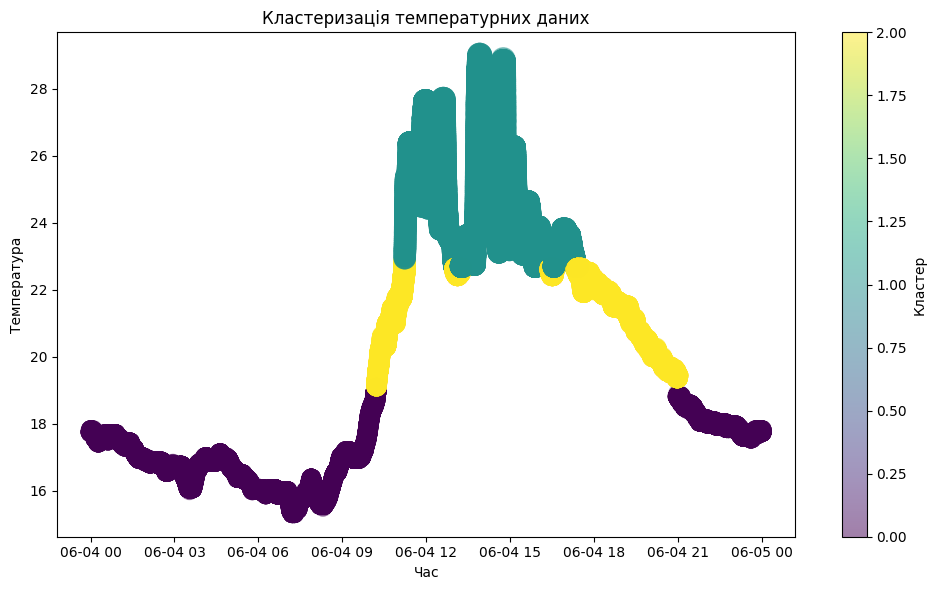

In [9]:
import matplotlib.pyplot as plt

# Створення графіку розсіювання точок, забарвлених за кластерами
plt.figure(figsize=(10, 6))
plt.scatter(data['Timestamp'], data['Temperature'], c=data['Cluster'], cmap='viridis', s=data['Temperature']*10, alpha=0.5)

# Додавання легенди з кольорами кластерів
cbar = plt.colorbar()
cbar.set_label('Кластер')

# Встановлення підписів осей x і y
plt.xlabel('Час')
plt.ylabel('Температура')

# Встановлення заголовка та налаштування компонування для кращої читабельності
plt.title('Кластеризація температурних даних')
plt.tight_layout()

# Показати графік
plt.show()

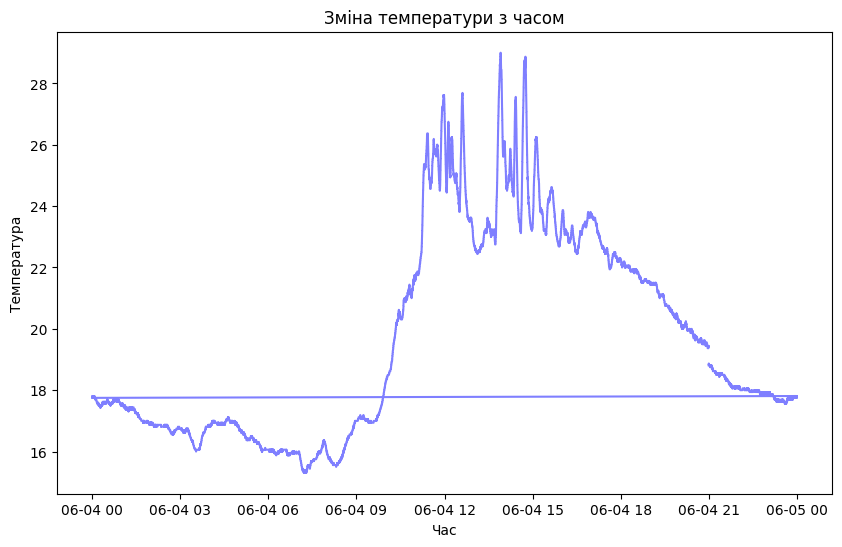

In [10]:
# Візуалізація даних температури у вигляді графіку
plt.figure(figsize=(10, 6))
plt.plot(data['Timestamp'], data['Temperature'], color='b', alpha=0.5)

# Встановлення підписів осей x і y
plt.xlabel('Час')
plt.ylabel('Температура')

# Встановлення заголовка
plt.title('Зміна температури з часом')

# Показати графік
plt.show()

# Ієрархічна агломеративна кластеризація (HAC)

У цій частині ми розглянемо процес застосування ієрархічної кластеризації до даних про температуру за допомогою бібліотеки sklearn у Python.

In [11]:
from sklearn.cluster import AgglomerativeClustering
n_clusters = 3
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical.fit(data[['Temperature', 'Hour']])

AgglomerativeClustering(n_clusters=3)

# Додавання міток кластерів до даних та візуалізація кластерів
Ми додаємо отримані мітки кластерів як новий стовпець з назвою "Ієрархічний_кластер" до фрейму даних.

In [12]:
data['Hierarchical_Cluster'] = hierarchical.labels_

Щоб краще зрозуміти результати, ми візуалізуємо кластери за допомогою діаграми розсіювання. Кожна точка даних представляє вимірювання температури, і точки позначені кольором відповідно до ієрархічного кластеру, до якого вони належать. Вісь x представляє годину, а вісь y - температуру.

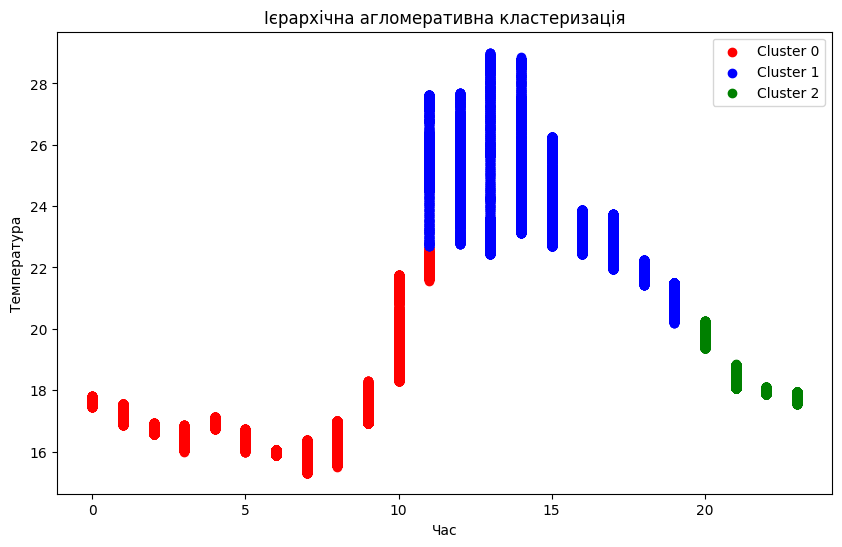

In [13]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green']
for cluster in range(n_clusters):
    cluster_data = data[data['Hierarchical_Cluster'] == cluster]
    plt.scatter(cluster_data['Hour'], cluster_data['Temperature'], color=colors[cluster], label=f'Cluster {cluster}')
plt.xlabel('Час')
plt.ylabel('Температура')
plt.title('Ієрархічна агломеративна кластеризація')
plt.legend()
plt.show()

У цьому коді ми ітераційно перебираємо кожен кластер і отримуємо точки даних, що належать цьому кластеру. Ми наносимо ці точки на діаграму розсіювання з різними кольорами для кожного кластера. Нарешті, ми додаємо мітки, заголовки та легенди, щоб зробити візуалізацію більш інформативною.

Дотримуючись цих кроків, ми успішно виконали ієрархічну кластеризацію температурних даних. Отримана діаграма розсіювання дає уявлення про те, як температура змінюється протягом дня, згрупована в ранкові, полуденні та вечірні кластери.

# Побудова графіку "Dendrogram"

Графік "Dendrogram" є важливим інструментом для візуалізації ієрархічної кластеризації. Він відображає ієрархію кластерів у вигляді дерева, де кожен вузол представляє окремий кластер, а відстань між вузлами вказує на схожість або віддаленість між кластерами.

Основні використання графіка "Dendrogram" включають:

1. Визначення оптимальної кількості кластерів: Графік "Dendrogram" дозволяє визначити оптимальну кількість кластерів шляхом аналізу відстаней між кластерами. Глядач може спостерігати, як дендрограма розділяється на групи, і вибрати таку кількість кластерів, яка найкраще відображає структуру даних.

2. Виявлення груп аномалій: Графік "Dendrogram" може допомогти виявити групи аномалій або викидів у даних. Аномальні точки, які не вписуються в жоден кластер або утворюють окрему гілку, можуть бути виявлені шляхом аналізу дендрограми.

3. Візуалізація ієрархічної структури: Графік "Dendrogram" дозволяє глядачам отримати уявлення про ієрархічну структуру кластерів. Він допомагає зрозуміти, як кластери групуються та взаємодіють між собою.

4. Порівняння різних методів кластеризації: Графік "Dendrogram" дозволяє порівняти результати різних методів кластеризації, які можуть мати різну структуру дерева. Це допомагає вибрати найкращий метод для конкретних даних та цілей кластеризації.

Загалом, графік "Dendrogram" є корисним інструментом для аналізу ієрархічної кластеризації і надає важливу інформацію про структуру та взаємозв'язки кластерів у наборі даних.

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Обчислення матриці відстаней
dist_matrix = linkage(data[['Temperature', 'Hour']], method='ward')

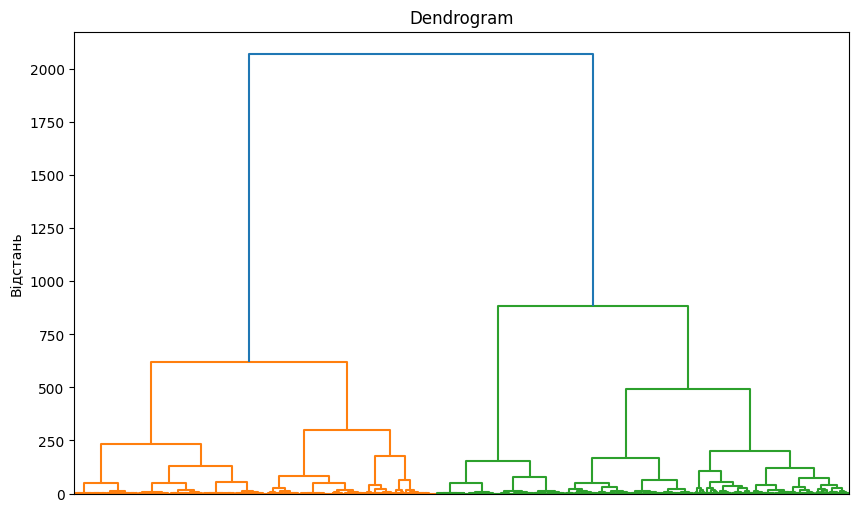

In [15]:
plt.figure(figsize=(10, 6))
dendrogram(dist_matrix, leaf_rotation=90, leaf_font_size=8, labels=None)
plt.title('Dendrogram')
plt.ylabel('Відстань')
plt.xticks([]) # Видаляємо підписи осі x
plt.show()

У коді додано рядок plt.xticks([]), який видаляє підписи на осі x. Це дозволяє відобразити графік дендрограми без міток на осі x, зберігаючи тільки заголовок та підпис осі y.

# Порівняння результатів ієрархічної кластеризації та кластеризації за методом k-середніх

Для порівняння результатів ієрархічної кластеризації та кластеризації за методом k-середніх ми можемо використовувати різні метрики оцінки, такі як оцінка силуету або скоригований індекс Ренда. Ось підхід на основі коду для порівняння двох методів кластеризації:

In [16]:
#Імпортуємо необхідні бібліотеки
from sklearn.metrics import silhouette_score, adjusted_rand_score

#Виконуємо ієрархічну кластеризацію
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data[['Temperature', 'Hour']])

#Виконуємо кластеризацію k-середніх
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(data[['Temperature', 'Hour']])

C:\Users\pavlo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Порівнюємо результати кластеризації
Ми можемо використовувати різні метри оцінки, такі як коефіцієнт силуету або скоригований індекс Ренда. В даному випадку я порівнюю кластеризацію за допомогою коефіцієнта силуету та скоригованого індексу Ренда.

In [17]:
hierarchical_silhouette = silhouette_score(data[['Temperature', 'Hour']], hierarchical_labels)
kmeans_silhouette = silhouette_score(data[['Temperature', 'Hour']], kmeans_labels)

hierarchical_rand_index = adjusted_rand_score(data['Hierarchical_Cluster'], hierarchical_labels)
kmeans_rand_index = adjusted_rand_score(data['Cluster'], kmeans_labels)

print("Коефіцієнт силуету - Ієрархічна кластеризація:", hierarchical_silhouette)
print("Коефіцієнт силуету - Кластеризація k-середніх:", kmeans_silhouette)
print("Скоригований індекс Ренда - Ієрархічна кластеризація:", hierarchical_rand_index)
print("Скоригований індекс Ренда - Кластеризація k-середніх:", kmeans_rand_index)

Коефіцієнт силуету - Ієрархічна кластеризація: 0.59006442177906
Коефіцієнт силуету - Кластеризація k-середніх: 0.6195672027888797
Скоригований індекс Ренда - Ієрархічна кластеризація: 1.0
Скоригований індекс Ренда - Кластеризація k-середніх: 0.5815209971480104


У цьому коді ми обчислюємо коефіцієнт силуету для ієрархічної кластеризації та кластеризації k-середніх за допомогою функції silhouette_score(). Коефіцієнт силуету вимірює, наскільки добре кожна точка даних підходить до призначеного кластера, зі значеннями в діапазоні від -1 до 1 (вищі значення вказують на кращу кластеризацію). Крім того, ми обчислюємо скоригований індекс Ренда за допомогою функції adjusted_rand_score(). Скоригований індекс Ренда вимірює схожість між двома наборами призначень кластерів, зі значеннями від 0 до 1 (вищі значення вказують на більш схожі результати кластеризації).

Порівнюючи коефіцієнти силуету та скориговані індекси Ренда для обох методів кластеризації, ми можемо оцінити, який з них краще підходить для нашого конкретного набору даних та цілей кластеризації.